In [37]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from math import *

In [43]:
x_list = []
y_list = []
z_list = []
r_list = []

nTrial = 0
nCheck = 0
nExp = 3000

while True:
  nTrial += 1
  x = rd.uniform(-3, 3)
  y = rd.uniform(-3, 3)
  z = rd.uniform(-3, 3)
  value = rd.uniform(0, (16*pi)**(3/2))

  if x**2 + y**2 + z**2 <= 9  and 4/3*pi*(x**2 + y**2 + z**2)**(3/2) > value:
    nCheck += 1
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    r_list.append(sqrt(x**2 + y**2 + z**2))

    if nCheck >= nExp:
      break

print(nTrial)
print(nCheck)

36704
3000


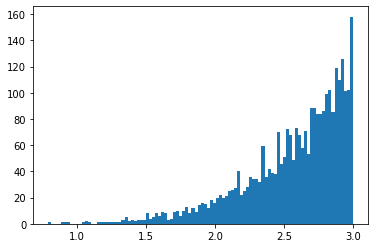

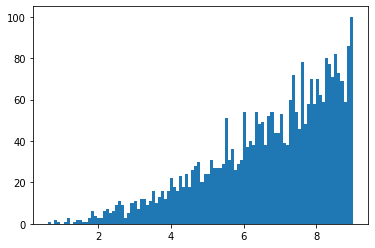

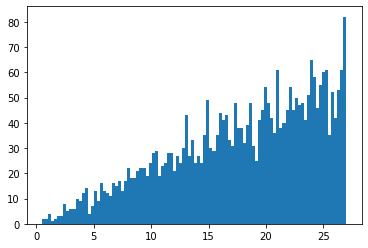

In [44]:
plt.hist(r_list, bins=100)
plt.show()

r_exp_list = []
r_3exp_list = []
for i in range(nCheck):
  r_exp_list.append(r_list[i]**2)
  r_3exp_list.append(r_list[i]**3)

plt.hist(r_exp_list, bins=100)
plt.show()

plt.hist(r_3exp_list, bins=100)
plt.show()

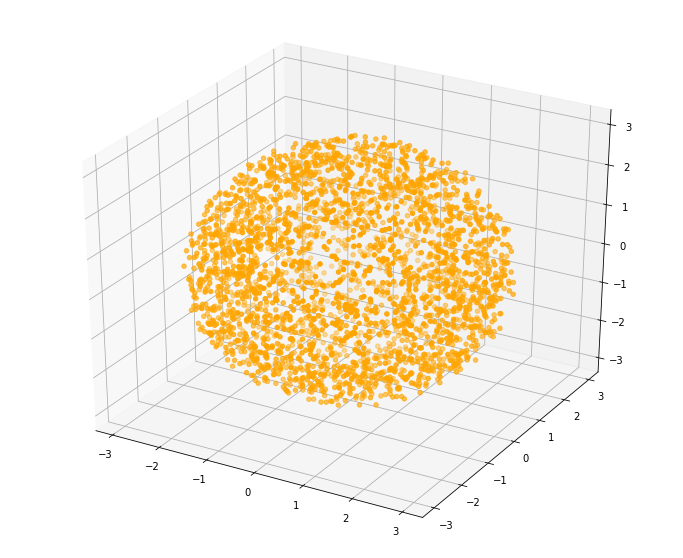

In [53]:
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')

ax.scatter(x_list, y_list, z_list, s=20, color="orange")
plt.show()

In [49]:
cordinate_particle = [10, 0, 0] # (10, 0, 0)에 입자가 있는 것

force_vector_xlist = []
force_vector_ylist = []
force_vector_zlist = []

force_vector_xmean = []
force_vector_ymean = []
force_vector_zmean = []

total_force = []
MC_error = []

#force vector 구하기
for i in tqdm.tqdm(range(len(x_list))):
    distance = sqrt((x_list[i]-10)**2 + y_list[i]**2 + z_list[i]**2)
    unit_vector = [(10 - x_list[i])/distance, -y_list[i]/distance, -z_list[i]/distance]
    force_scalar = 10 * 10 / distance**2 # q1 * q2 / r**2을 한 것(상수 k 무시)
    force_vector_xlist.append(unit_vector[0] * force_scalar)
    force_vector_ylist.append(unit_vector[1] * force_scalar)
    force_vector_zlist.append(unit_vector[2] * force_scalar)
    force_vector_xmean.append(sum(force_vector_xlist)/len(force_vector_xlist))
    force_vector_ymean.append(sum(force_vector_ylist)/len(force_vector_ylist))
    force_vector_zmean.append(sum(force_vector_zlist)/len(force_vector_zlist))
    total_force.append(sqrt(force_vector_xmean[i]**2 + force_vector_ymean[i]**2 + force_vector_zmean[i]**2))

for i in range(1, len(x_list)):
      MC_error.append(abs((total_force[i] - total_force[i-1]) / total_force[i]))

100%|██████████| 3000/3000 [00:00<00:00, 31234.73it/s]


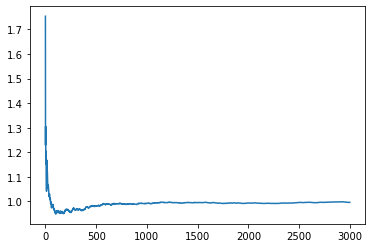

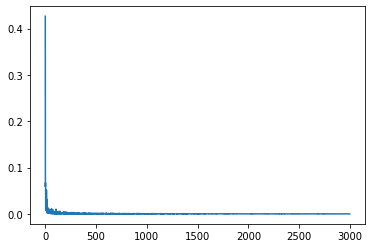

0.9964637003808094
9.161931660834747e-05


In [51]:
plt.plot(total_force)
plt.show()

plt.plot(MC_error)
plt.show()

print(total_force[len(total_force) - 1])
print(MC_error[len(MC_error) - 1])